<a href="https://colab.research.google.com/github/Shahidulla-Vantela/Random_Forest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/random_forest_dataset.txt', delimiter='\t')
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,-2.273577,0.025135,-0.098951,-1.910959,-0.490930,-2.612120,-2.340507,-0.072464,2.671115,-0.658415,1
1,-2.633602,-1.064530,0.596068,-0.315907,3.620619,0.243131,-4.924947,1.309551,-0.441909,8.134933,1
2,2.560910,1.289750,1.271519,2.424127,-1.311381,-0.850302,2.476814,0.341372,2.234609,-5.429692,0
3,0.255632,-3.290428,1.514160,-0.085143,1.126927,-4.755379,0.820723,2.578251,0.362170,-3.539635,0
4,-1.250910,0.373713,1.226333,1.505599,-0.718096,1.228442,2.782940,-1.623311,2.992206,-6.717889,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   10000 non-null  float64
 1   Feature_2   10000 non-null  float64
 2   Feature_3   10000 non-null  float64
 3   Feature_4   10000 non-null  float64
 4   Feature_5   10000 non-null  float64
 5   Feature_6   10000 non-null  float64
 6   Feature_7   10000 non-null  float64
 7   Feature_8   10000 non-null  float64
 8   Feature_9   10000 non-null  float64
 9   Feature_10  10000 non-null  float64
 10  Target      10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [ ]:
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.498248,0.513540,0.494077,-0.495842,0.010645,-0.970986,0.002030,-0.508307,0.986822,-0.932588,0.499900
std,2.613448,1.731811,1.607506,1.850907,1.997441,1.702145,2.037718,1.936390,1.680416,3.881307,0.500025
min,-10.476747,-6.156499,-6.033566,-7.394572,-6.982064,-7.442351,-7.102671,-7.803354,-5.559254,-15.944379,0.000000
25%,-2.220386,-0.673676,-0.545721,-1.742369,-1.317776,-2.102693,-1.376583,-1.827907,-0.104993,-3.578318,0.000000
50%,-0.581974,0.543905,0.593502,-0.578589,0.054258,-0.951348,0.125829,-0.567991,1.008356,-1.083058,0.000000
75%,1.082934,1.693135,1.590028,0.705800,1.404745,0.164727,1.402843,0.785883,2.107281,1.595906,1.000000
max,10.528498,6.841451,6.472601,6.307248,6.936276,5.611381,6.842219,7.004232,7.749314,14.327434,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,0
Feature_7,0
Feature_8,0
Feature_9,0
Feature_10,0


In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

X_train.shape, y_train.shape

((8000, 10), (8000,))

In [ ]:
X_test.shape, y_test.shape

((2000, 10), (2000,))

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[0.86 0.14]
 [0.01 0.99]
 [0.09 0.91]
 ...
 [0.15 0.85]
 [0.21 0.79]
 [0.01 0.99]]
Accuracy-Score: 0.929
Classification-Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1007
           1       0.92      0.94      0.93       993

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Confusion-Matrix:
[[920  87]
 [ 55 938]]


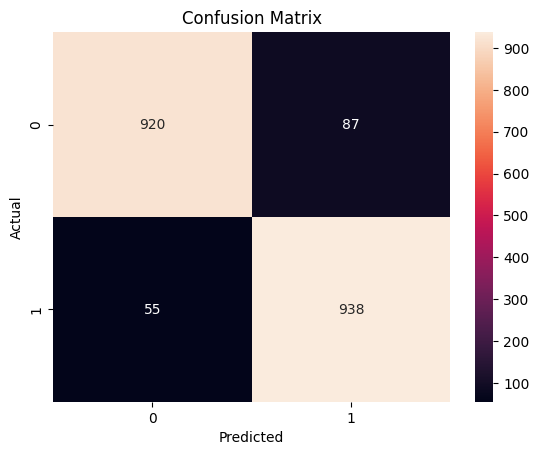

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Y_pred_prob = rf.predict_proba(X_test)
print(Y_pred_prob)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy-Score: {acc}")

report = classification_report(y_test, y_pred)
print(f"Classification-Report:\n{report}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion-Matrix:\n{cm}")

sns.heatmap(cm, annot=True, fmt='d', color='Blue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.9780429241032811


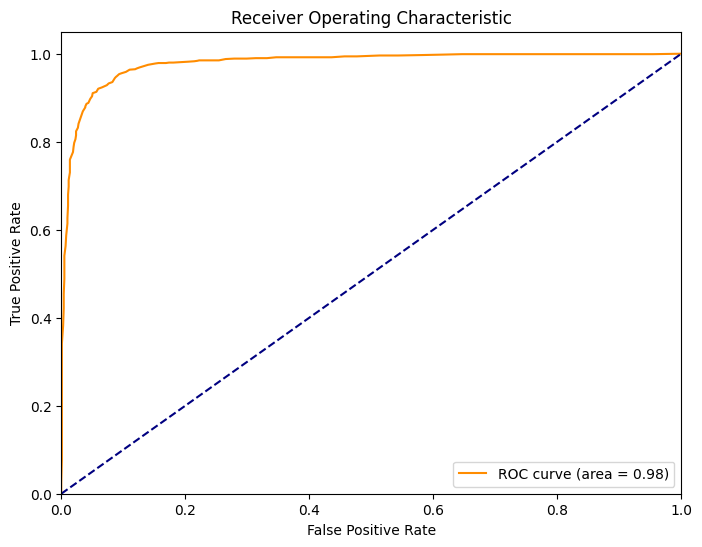

In [ ]:
roc_score = roc_auc_score(y_test, Y_pred_prob[:,1])
print('ROC AUC Score:', roc_score)

fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Model: RandomForestClassifier()
Confusion-Matrix:
[[926  81]
 [ 61 932]]
Accuracy-Score: 0.929
Classification-Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1007
           1       0.92      0.94      0.93       993

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



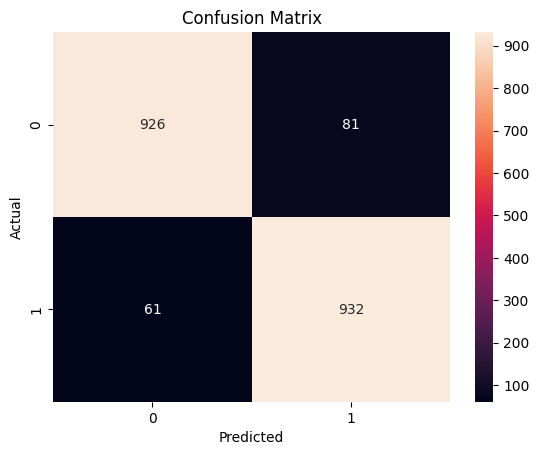

In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5,10]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid.best_estimator_
print(f"Best Model: {best_model}")

y_pred = best_model.predict(X_test)

y_pred_prob = best_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion-Matrix:\n{cm}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy-Score: {acc}")

report = classification_report(y_test, y_pred)
print(f"Classification-Report:\n{report}")

sns.heatmap(cm, annot=True, fmt='d', color='Blue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.9783214377504498


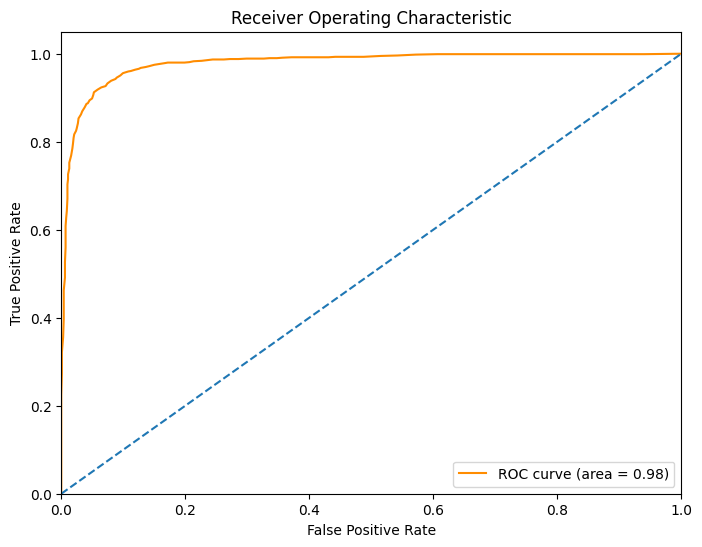

In [ ]:
roc_score = roc_auc_score(y_test, y_pred_prob[:,1])
print('ROC AUC Score:', roc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange', label = f'ROC curve (area = {roc_score:.2f})')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

      Feature  Importance
1   Feature_2    0.141782
2   Feature_3    0.130546
3   Feature_4    0.117804
8   Feature_9    0.098357
7   Feature_8    0.093173
4   Feature_5    0.092729
5   Feature_6    0.091573
0   Feature_1    0.085079
9  Feature_10    0.076850
6   Feature_7    0.072108


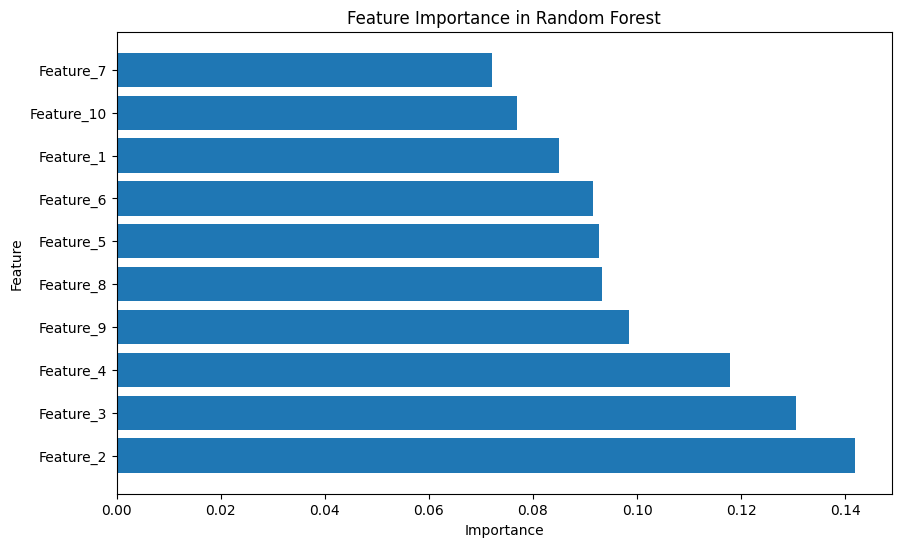

In [ ]:
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
top_features = 3
selected_features = importance_df['Feature'][:top_features].tolist()

print(f"Top {top_features} Selected Features:")
print(selected_features)

X_selected = X[selected_features]

X_s_train, X_s_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Top 3 Selected Features:
['Feature_2', 'Feature_3', 'Feature_4']


In [ ]:
X_s_train = sc.fit_transform(X_s_train)
X_s_test = sc.transform(X_s_test)

Accuracy-Score: 0.725
Classification-Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1007
           1       0.72      0.74      0.73       993

    accuracy                           0.72      2000
   macro avg       0.73      0.73      0.72      2000
weighted avg       0.73      0.72      0.72      2000

Confusion-Matrix:
[[719 288]
 [262 731]]


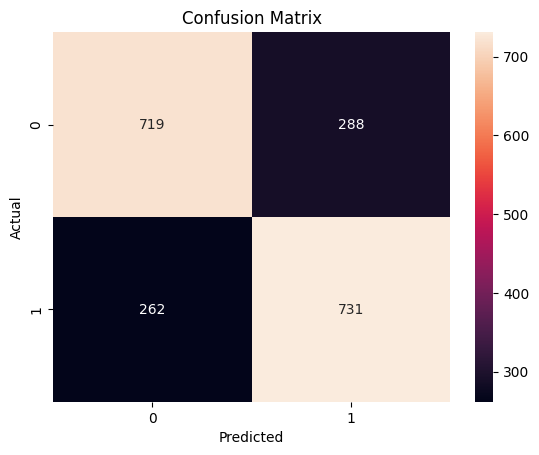

In [ ]:
rf_selected = RandomForestClassifier(**best_params)
rf_selected.fit(X_s_train, y_train)

y_pred_selected = rf_selected.predict(X_s_test)

y_pred_prob_selected = rf_selected.predict_proba(X_s_test)[:,1]

acc_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy-Score: {acc_selected}")

report_selected = classification_report(y_test, y_pred_selected)
print(f"Classification-Report:\n{report_selected}")

cm_selected = confusion_matrix(y_test, y_pred_selected)
print(f"Confusion-Matrix:\n{cm_selected}")

sns.heatmap(cm_selected, annot=True, fmt='d', color='Blue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

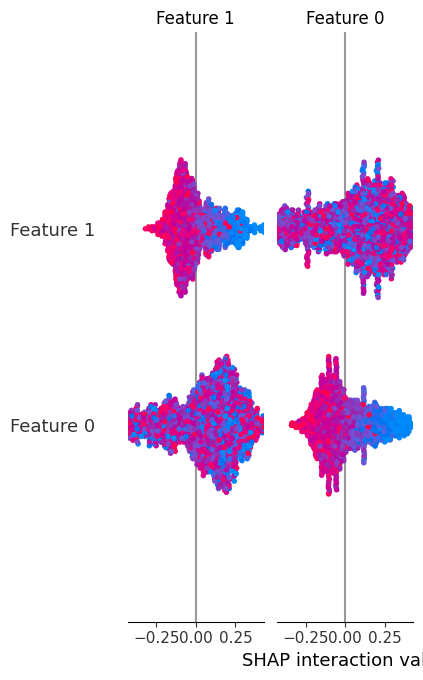

In [ ]:
import shap

explainer = shap.TreeExplainer(rf_selected)
shap_values = explainer.shap_values(X_s_test)

shap.summary_plot(shap_values, X_s_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=200)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

# Print cross-validation scores and their mean
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')

Cross-Validation Scores: [0.923  0.928  0.924  0.9315 0.926 ]
Mean Cross-Validation Score: 0.93


In [ ]:
!pip install shap

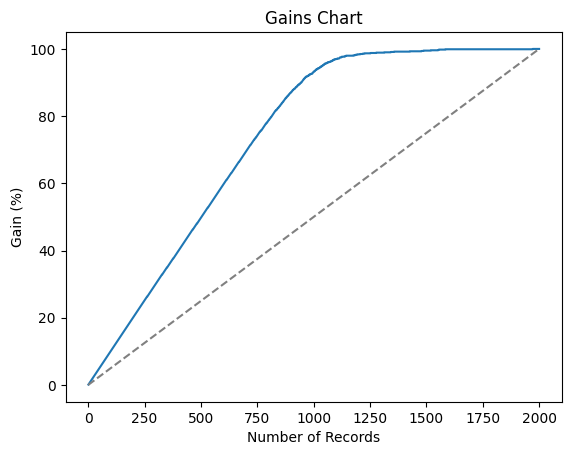

In [ ]:
def plot_gains_chart(y_true, y_pred_prob):
  """Plots a gains chart.

  Args:
    y_true: True labels.
    y_pred_prob: Predicted probabilities.
  """

  df = pd.DataFrame({'y_true': y_true, 'y_pred_prob': y_pred_prob})
  df = df.sort_values('y_pred_prob', ascending=False)
  df['cumulative_true'] = df['y_true'].cumsum()
  df['cumulative_total'] = range(1, len(df) + 1)
  df['gain'] = (df['cumulative_true'] / df['y_true'].sum()) * 100

  plt.plot(df['cumulative_total'], df['gain'])
  plt.plot([0, len(df)], [0, 100], linestyle='--', color='gray')
  plt.xlabel('Number of Records')
  plt.ylabel('Gain (%)')
  plt.title('Gains Chart')
  plt.show()

plot_gains_chart(y_test, y_pred_prob[:, 1])


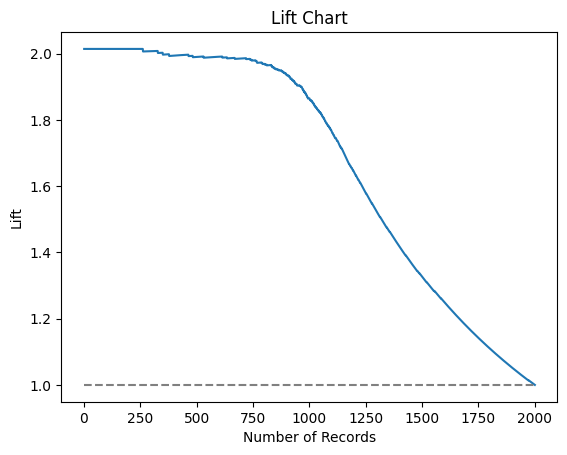

In [ ]:
def plot_lift_chart(y_true, y_pred_prob):
  """Plots a lift chart.

  Args:
    y_true: True labels.
    y_pred_prob: Predicted probabilities.
  """

  df = pd.DataFrame({'y_true': y_true, 'y_pred_prob': y_pred_prob})
  df = df.sort_values('y_pred_prob', ascending=False)
  df['cumulative_true'] = df['y_true'].cumsum()
  df['cumulative_total'] = range(1, len(df) + 1)
  df['lift'] = (df['cumulative_true'] / df['cumulative_total']) / (df['y_true'].sum() / len(df))

  plt.plot(df['cumulative_total'], df['lift'])
  plt.plot([0, len(df)], [1, 1], linestyle='--', color='gray')
  plt.xlabel('Number of Records')
  plt.ylabel('Lift')
  plt.title('Lift Chart')
  plt.show()


plot_lift_chart(y_test, y_pred_prob[:, 1])
